In [ ]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
RunningInCOLAB

True

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-w8qpgrno
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-w8qpgrno
     |████████████████████████████████| 904 kB 7.0 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15945 sha256=80e36b9571097057f6d8c823ed2a019196732a50e216adf8d422f84441b846f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ak23u85r/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download


In [ ]:
from google_images_download import google_images_download

In [ ]:
# response = google_images_download.googleimagesdownload()
# arguments = {"keywords":"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona",
#              "limit":50,"print_urls":False}
# paths = response.download(arguments)

# print(paths)

!git clone https://github.com/danycenas/downloads.git
!rm -rf downloads/.git/

Cloning into 'downloads'...
remote: Enumerating objects: 779, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 779 (delta 0), reused 3 (delta 0), pack-reused 775
Receiving objects: 100% (779/779), 262.82 MiB | 33.00 MiB/s, done.
Checking out files: 100% (767/767), done.


response = google_images_download.googleimagesdownload()
arguments = {"keywords":"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona",
             "limit":50,"print_urls":False}
paths = response.download(arguments)

print(paths)
#"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona"

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
from PIL import Image

In [ ]:
import os

In [ ]:
#os.getcwd()

In [ ]:
#os.chdir("TF")

In [ ]:
dataset = datasets.ImageFolder('downloads',
                              transform=transforms.Compose([
                                  #transforms.RandomResizedCrop(224),
                                  transforms.Resize(255),
                                  transforms.CenterCrop(255),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])
                                  ]))

class_names = dataset.classes
print(class_names)

['auto', 'bulldozer', 'camion', 'camion_minero', 'camioneta', 'excavadora', 'otro', 'persona']


In [ ]:
n_test = int(len(dataset) * 1)
n_train = len(dataset) - n_test

train_dataset, test_dataset = random_split(dataset, [n_train, n_test])

print(f'n_train={len(train_dataset)}')
print(f'n_test={len(test_dataset)}')

n_train=0
n_test=764


In [ ]:
#train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [ ]:
def imshow(inp, title = None):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)

  if title is not None:
    plt.title(title)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
device

device(type='cuda', index=0)

In [ ]:
ft_model = models.resnet18(pretrained=True)
print(ft_model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [ ]:
ft_model.fc = nn.Linear(512, 8)

In [ ]:
ft_model_state_dict = torch.load('downloads/model.pth')
ft_model.load_state_dict(ft_model_state_dict)
ft_model = ft_model.to(device)

In [ ]:
ft_optimizer = torch.optim.SGD(ft_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
ft_optimizer_state_dict = torch.load('downloads/optimizer.pth')
ft_optimizer.load_state_dict(ft_optimizer_state_dict)

In [ ]:
def visualize_model(model, num_images = 8):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)
      
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      
      for j in range(inputs.size()[0]):
        images_so_far += 1
        ax = plt.subplot(num_images//2, 2, images_so_far)
        ax.axis('off')
        ax.set_title(f'predicted: {class_names[preds[j]]}')
        imshow(inputs.cpu().data[j])
        
        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode = was_training)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


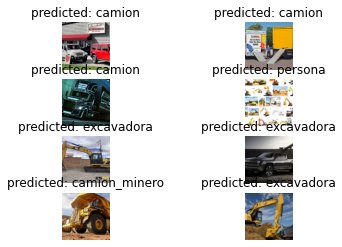

In [ ]:
visualize_model(ft_model)

In [ ]:
# Imagen de prueba
# !wget https://github.com/vision-artificial-pucp/invierno-2021/raw/main/car2.jpg
img = Image.open('minero3.jpg')

In [ ]:
# Referencia

img = Image.open('minero3.jpg')

# device = torch.device('cpu')

# ft_model = models.resnet18(pretrained=True)
# ft_model.fc = nn.Linear(512, 8)
# ft_model_state_dict = torch.load('downloads/model.pth', map_location=device)
# ft_model.load_state_dict(ft_model_state_dict)
# ft_model = ft_model.to(device)

# ft_optimizer = torch.optim.SGD(ft_model.parameters(), lr=0.001, momentum=0.9)
# ft_optimizer_state_dict = torch.load('downloads/optimizer.pth', map_location=device)
# ft_optimizer.load_state_dict(ft_optimizer_state_dict)

# oka

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    ft_model.to('cuda')

ft_model.eval()

with torch.no_grad():
    output = ft_model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
# probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(probabilities)

class_names = ['auto', 'bulldozer', 'camion', 'camion_minero', 'camioneta', 'excavadora', 'otro', 'persona']

top5_prob, top5_catid = torch.topk(probabilities, 8)
for i in range(top5_prob.size(0)):
    print(class_names[top5_catid[i]], top5_prob[i].item())

device

tensor([[-8.6681,  0.1250,  6.9450, -7.0926, -7.5900,  6.5074, -4.1262,  9.3925]],
       device='cuda:0')
tensor([1.2547e-06, 8.2664e-03, 7.5721e+00, 6.0639e-06, 3.6875e-06, 4.8884e+00,
        1.1777e-04, 8.7531e+01], device='cuda:0')
persona 87.53105163574219
camion 7.57211446762085
excavadora 4.888439655303955
bulldozer 0.008266353979706764
otro 0.00011777137842727825
camion_minero 6.063852197257802e-06
camioneta 3.6875278510706266e-06
auto 1.2546805692181806e-06


device(type='cuda', index=0)

In [ ]:
# from torchvision.transforms import ToTensor 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Definimos algunas funciones
def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    ''' transformando imagen '''
    net.eval()

    # img = torch.from_numpy(BasicDataset.preprocess(full_img, scale_factor))
    img = transform(full_img).float()
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    with torch.no_grad():
        output = net(img)

    return output

def mask_to_image(mask):
  return Image.fromarray((mask * 255).astype(np.uint8))

In [ ]:
# Predicción por imagen

mask = predict_img(net=ft_model,
                    full_img=img,
                    scale_factor=1,
                    out_threshold=0.5,
                    device=device)

probabilities = torch.nn.functional.softmax(mask, dim=1)[0] * 100
print(probabilities)

top5_prob, top5_catid = torch.topk(probabilities, 8)
for i in range(top5_prob.size(0)):
    print(class_names[top5_catid[i]], top5_prob[i].item())



tensor([8.3118e-04, 1.0337e-01, 2.0123e-01, 7.4566e-02, 1.1450e-04, 7.9364e+01,
        4.3762e-02, 2.0212e+01], device='cuda:0')
excavadora 79.3638916015625
persona 20.212234497070312
camion 0.2012326866388321
bulldozer 0.10337289422750473
camion_minero 0.07456592470407486
otro 0.0437622144818306
auto 0.0008311787387356162
camioneta 0.00011450336751295254
